# LOAN APPROVAL DATA - CLUSTERING ANALYSIS

In this project, I performed an unsupervised machine learning analysis on a loan approval dataset using clustering techniques to uncover hidden patterns within the data. The primary objective was to group loan applicants into distinct segments based on their financial and demographic attributes, aiding financial institutions in making informed loan approval decisions and assessing applicant risk profiles more effectively. The dataset included various features such as Applicant_ID, Age, Income, Credit_Score, Loan_Amount, Loan_Term, Interest_Rate, Employment_Status, Debt_to_Income_Ratio, Marital_Status, Number_of_Dependents, Property_Ownership, Loan_Purpose, and Previous_Defaults. For clustering, I specifically focused on Credit_Score and Debt_to_Income_Ratio as key variables, as these provide crucial insights into an applicant’s financial stability and repayment capacity. Credit_Score helps assess the likelihood of loan repayment, while Debt_to_Income_Ratio indicates the financial burden of debt relative to income. I standardized these variables using StandardScaler to ensure balanced contributions to the clustering process.

The K-Means algorithm was then applied to segment the applicants into clusters. To determine the optimal number of clusters, I used the elbow plot method, which involves plotting the within-cluster sum of squares (WCSS) against a range of cluster counts. The "elbow" point on this plot, where the rate of decrease sharply slows, indicates the ideal cluster count for the model. Additionally, I utilized Principal Component Analysis (PCA) to reduce the dataset's dimensionality and visualize the clusters effectively. The PCA visualization provided a clear, two-dimensional representation of the clusters, helping to illustrate how the applicants were grouped based on their financial profiles. This approach enhanced the interpretability of the clustering results and facilitated better insights into applicant segmentation.

Importing Dataset and Libraries

In [ ]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
df=pd.read_csv(r"C:\Users\Madhuma k\Downloads\archive (23)\loan_approval_dataset.csv")
df.head()

,Applicant_ID,Age,Income,Credit_Score,Loan_Amount,Loan_Term,Interest_Rate,Employment_Status,Debt_to_Income_Ratio,Marital_Status,Number_of_Dependents,Property_Ownership,Loan_Purpose,Previous_Defaults
0,1,56,21920,639,452748,72,4.53,Unemployed,43.35,Married,2,Mortgage,Business,0
1,2,69,126121,655,257134,60,5.38,Unemployed,10.42,Divorced,0,Mortgage,Education,0
2,3,46,96872,467,226437,72,3.46,Self-Employed,45.39,Divorced,4,Mortgage,Car,0
3,4,32,101132,751,310480,12,14.00,Unemployed,8.58,Single,2,Mortgage,Business,0
4,5,60,22093,404,13070,12,9.13,Self-Employed,20.70,Divorced,1,Mortgage,Home,0


Finding Null Values

In [ ]:
df.isna().sum()

Applicant_ID            0
Age                     0
Income                  0
Credit_Score            0
Loan_Amount             0
Loan_Term               0
Interest_Rate           0
Employment_Status       0
Debt_to_Income_Ratio    0
Marital_Status          0
Number_of_Dependents    0
Property_Ownership      0
Loan_Purpose            0
Previous_Defaults       0
dtype: int64

Removing Duplicates

In [ ]:
df.drop_duplicates(inplace=True)

Encoding Categorical Values

In [ ]:
le=LabelEncoder()
column_to_convert=['Employment_Status','Marital_Status','Property_Ownership','Loan_Purpose']
for col in column_to_convert:
    df[col]=le.fit_transform(df[col])
df.head(10)

,Applicant_ID,Age,Income,Credit_Score,Loan_Amount,Loan_Term,Interest_Rate,Employment_Status,Debt_to_Income_Ratio,Marital_Status,Number_of_Dependents,Property_Ownership,Loan_Purpose,Previous_Defaults
0,1,56,21920,639,452748,72,4.53,2,43.35,1,2,0,0,0
1,2,69,126121,655,257134,60,5.38,2,10.42,0,0,0,2,0
2,3,46,96872,467,226437,72,3.46,1,45.39,0,4,0,1,0
3,4,32,101132,751,310480,12,14.00,2,8.58,2,2,0,0,0
4,5,60,22093,404,13070,12,9.13,1,20.70,0,1,0,3,0
5,6,25,32905,449,6320,24,7.46,2,32.47,2,0,1,2,0
6,7,38,141759,445,356187,72,9.19,1,30.17,1,2,2,4,0
7,8,56,175423,598,306065,24,10.35,0,9.34,3,4,0,1,0
8,9,36,50981,466,11589,24,14.02,1,40.95,1,2,2,0,0
9,10,40,93903,347,462625,48,4.73,0,48.79,3,4,1,2,0


Feature Selection

In [ ]:
x=df.iloc[:,[3,8]].values
x=pd.DataFrame(x)


Data Scaling

In [ ]:
scalar=StandardScaler()
scaled_features=scalar.fit_transform(x)

Determining the Optimal Number of clusters(Elbow Method)

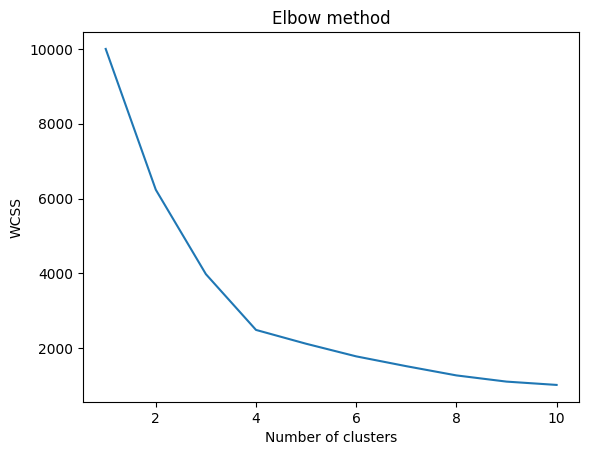

In [ ]:
#elbow method
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

#PLOT
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
optimal_k=4

K-Means Clustering

In [ ]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)
# Calculate the mean of the features for each cluster

cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

         Applicant_ID        Age         Income  Credit_Score    Loan_Amount  \
Cluster                                                                        
0         2521.928811  44.010888  109039.575377    716.948074  253222.466499   
1         2517.278689  42.924590  113511.690164    433.832787  258306.123770   
2         2480.482599  43.661253  107280.597061    438.215777  247352.231245   
3         2484.897912  43.737046  111144.553751    710.743233  250026.963650   

         Loan_Term  Interest_Rate  Employment_Status  Debt_to_Income_Ratio  \
Cluster                                                                      
0        41.618090       8.965787           0.967337             38.877982   
1        40.878689       8.855869           1.006557             15.840082   
2        42.180974       8.850712           0.977572             37.985251   
3        42.338747       8.825839           1.003867             16.261469   

         Marital_Status  Number_of_Dependents  Pro

Dimensionality Reduction with PCA

In [ ]:
# Reduce to 2D for visualization

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Create a DataFrame for the reduced features and clusters
reduced_data = pd.DataFrame(reduced_features, columns=['PCA1', 'PCA2'])
reduced_data['Cluster'] = df['Cluster']

Visualizing Clusters in two Dimensions

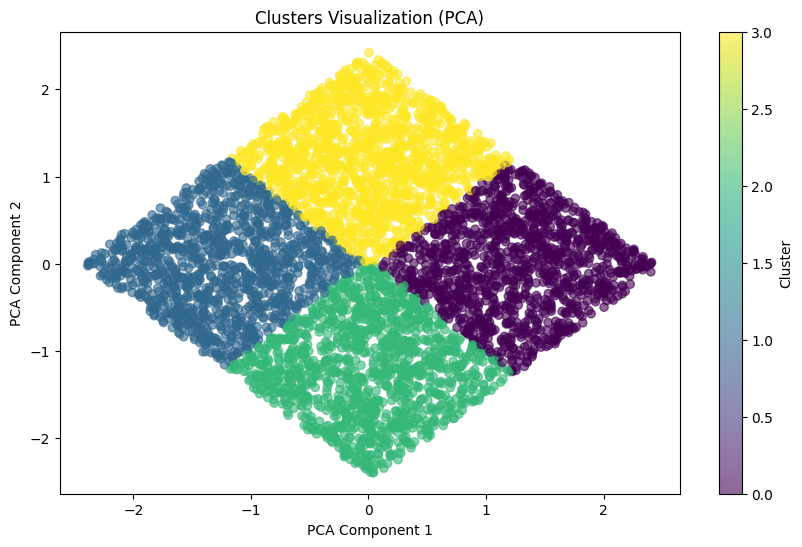

In [ ]:
# Plotting the clusters

plt.figure(figsize=(10, 6))
plt.scatter(reduced_data['PCA1'], reduced_data['PCA2'], c=reduced_data['Cluster'], cmap='viridis', alpha=0.6)
plt.title('Clusters Visualization (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

Conclusion: In this project, I applied K-Means clustering to the loan approval dataset using Credit Score and Debt to Income Ratio as the primary features. The Elbow Method helped determine the optimal number of clusters, which was set to 4. After fitting the model, I performed Principal Component Analysis (PCA) to reduce the data to two dimensions for visualization. The resulting scatter plot demonstrated well-defined and distinct clusters, indicating that the model effectively segmented applicants based on their financial profiles. This clustering approach can aid financial institutions in identifying distinct applicant groups, facilitating targeted decision-making and tailored financial strategies.